In [5]:
#Auto3DPFM v1.1.1
#Last Editted on Vero South Computer by Ralph Bulanadi
#For internal CNMS use

from ralph_tools import *
import re
import win32com.client
import os
from matplotlib_scalebar.scalebar import ScaleBar
import time
import numpy as np
from glob import glob
from igor2 import binarywave
import matplotlib.pyplot as plt

client = "IgorPro.Application"
igor = win32com.client.Dispatch(client)

orig_directory = os.getcwd()
igor.Execute('NewPath/O mypath "'+windows2igor(orig_directory)+'"' )
igor.Execute('OpenProc /P=mypath /V=0 "igor_code.ipf"')

data = igor.DataFolder(r"root:packages:MFP3D:Main:Variables").Wave("MasterVariablesWave")
dim = data.GetDimensions()[1]
gmv = {}
for i in range(dim):
    gmv[data.DimensionLabel(0,i,0)] = data.GetNumericWavePointValue(i)


In [6]:
file_loc = r'D:\User Data\Ralph\3DPFM_Test\PolyPZT'
base_filename = 'Image'
log_filename = 'Log_3DPFM'
closed_LD = False

---
Capturing Image:
   OImage0000.tif


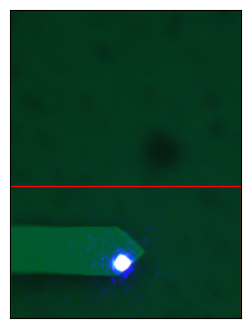

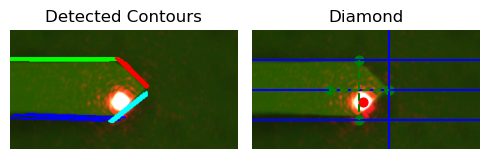

Calculated Position:
[0.13031539970316497, -0.3831532872126566]
Reasonable
---
Capturing Image:
   OImage0001.tif


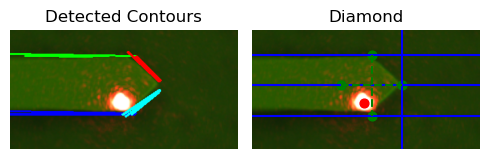

Calculated Position:
[-0.2680455917790763, -0.5734814179994672]
Reasonable
---
Capturing Image:
   OImage0002.tif


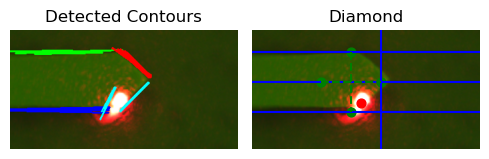

Calculated Position:
[0.32847032408799404, -0.6898837109501461]
Reasonable
---
Capturing Image:
   OImage0003.tif


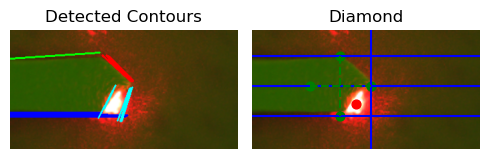

Calculated Position:
[0.5252003419942908, -0.6132565452639613]
Reasonable
---
Capturing Image:
   OImage0004.tif


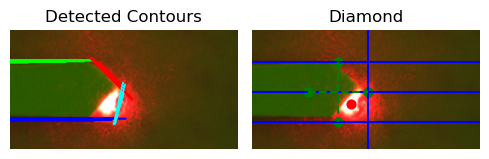

Calculated Position:
[0.44578421376226274, -0.39701359915310697]
Unreasonable
---
Capturing Image:
   OImage0005.tif


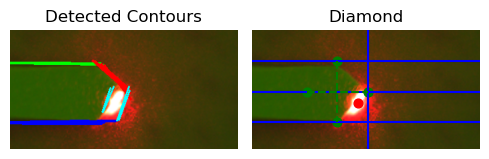

Calculated Position:
[0.6799380904093506, -0.37114453395220126]
Unreasonable
---
Capturing Image:
   OImage0006.tif


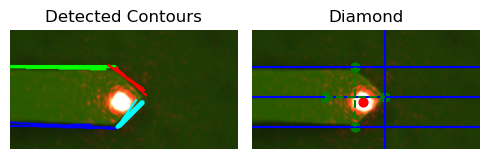

Calculated Position:
[0.2637025948989722, -0.165651230678725]
Reasonable
---
Capturing Image:
   OImage0007.tif


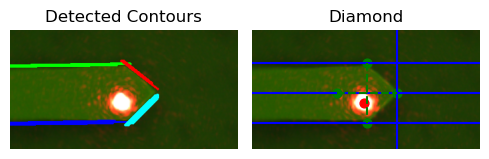

Calculated Position:
[-0.11314999327257313, -0.3098379804404017]
Reasonable
---
Capturing Image:
   OImage0008.tif


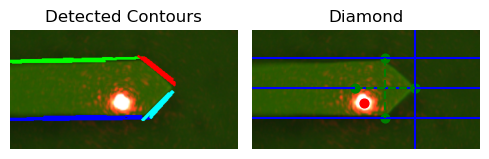

Calculated Position:
[-0.6982402809261121, -0.48137795771677117]
Reasonable
---
Capturing Image:
   OImage0009.tif


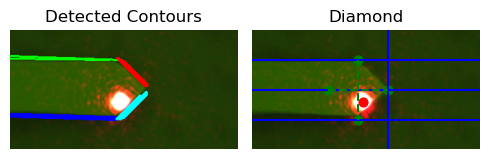

Calculated Position:
[0.15152056446210915, -0.38916792700611835]
Reasonable
Affine Transform:
[[  15.45111012   -4.00781428]
 [  -4.61013408  107.09100931]
 [1143.67948485 -493.69607117]]
Valid Diamonds:
8 out of 10


In [7]:
T = calculate_asylum_coordinate_to_lab_coordinate_transform(igor,
                                                             file_loc = file_loc,
                                                             base_filename = base_filename,
                                                             log_filename = log_filename,
                                                             auto_calc_centre = True,
                                                             verbose=True)

Ensure Laser Off 


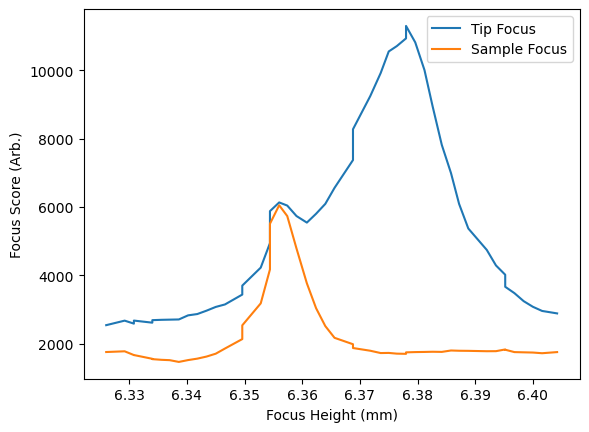

In [8]:
tip_focus, sample_focus = auto_focus_calc (igor,
                     file_loc = file_loc,
                     base_filename = base_filename,
                     log_filename = log_filename,
                     save_plot = True,
                     save_plot_filename = 'FocusPlot',
                     auto_calc_centre = True,
                     #test=True
                     step_size = 8
                    )

In [9]:
auto_focus_save(igor, tip_focus, sample_focus)

In [ ]:
#First, move to blind spot, then run this block

x0 = set_blind_spot_x(igor, T, 
                     file_loc = file_loc,
                     base_filename = base_filename,
                     log_filename = log_filename,
                     closed_LD = closed_LD)

---


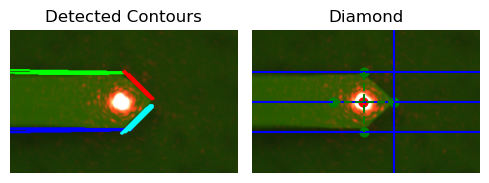

Calculated Position:
[-0.013651616887203288, -0.012895570550618185]
Capturing Image:
   OImage0081.tif
Doing Force Curve:
   FImage0000.ibw
Tip Focus:
   0.006378599908202887
Sample Focus:
   0.006356399971991777
Engage Height:
   1.0213575e-06
Calculated h:
   2.0556254964708662e-05
---


In [12]:
h = measure_tip_height(igor,
                       T,
                       file_loc = file_loc,
                       base_filename = base_filename,
                       log_filename = log_filename,
                       closed_LD = closed_LD
                       )

In [13]:
reduce_frequency(igor, log_filename, mod=100000)

Current Frequency:
   409173.9933937788
Reduced Frequency:
   29173.9933937788


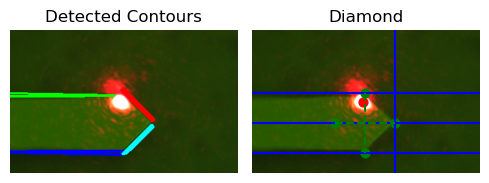

Calculated Position:
[-0.07635078269651518, 0.6732028995706953]
Doing Force Curve:
   FFImage0006.ibw
Nominal InvOLS:
   5.03163e-07
Capturing Image:
   OImage0128.tif
Doing Scan:
   AImage0008.ibw


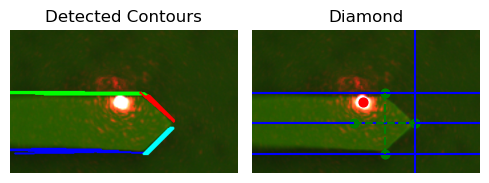

Calculated Position:
[-0.7084703193886015, 0.700315487270089]
Doing Force Curve:
   FFImage0007.ibw
Nominal InvOLS:
   5.557714e-07
Capturing Image:
   OImage0135.tif
Doing Scan:
   XImage0009.ibw


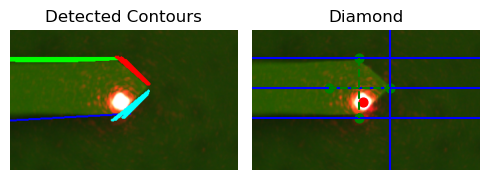

Calculated Position:
[0.12440312418899935, -0.471143445126065]
Doing Force Curve:
   FFImage0008.ibw
Nominal InvOLS:
   4.9627437e-07
Capturing Image:
   OImage0142.tif
Doing Scan:
   YImage0010.ibw


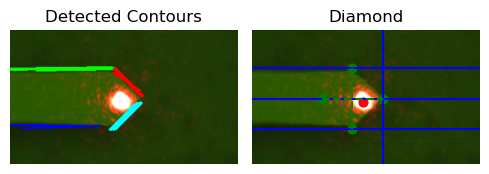

Calculated Position:
[0.3604147843004597, -0.1000657090218311]
Doing Force Curve:
   FFImage0009.ibw
Nominal InvOLS:
   4.829214e-07
Capturing Image:
   OImage0149.tif
Doing Scan:
   BImage0011.ibw


In [17]:
filelist = run_tip_location_scans_at_points(igor,
                                     T,
                                     sequence= ['A', 'X', 'Y', 'B'],
                                     file_loc = file_loc,
                                     base_filename = base_filename,
                                     log_filename = log_filename,
                                     dist_proportion_x = 0.7,
                                     dist_proportion_y = 0.7,
                                     closed_LD = closed_LD)

C:\Users\Asylum User\AppData\Roaming\Python\Python312\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\Asylum User\AppData\Roaming\Python\Python312\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\Asylum User\AppData\Roaming\Python\Python312\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\Asylum User\AppData\Roaming\Python\Python312\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\Asylum User\AppData\Roaming\Python\Python312\site-p

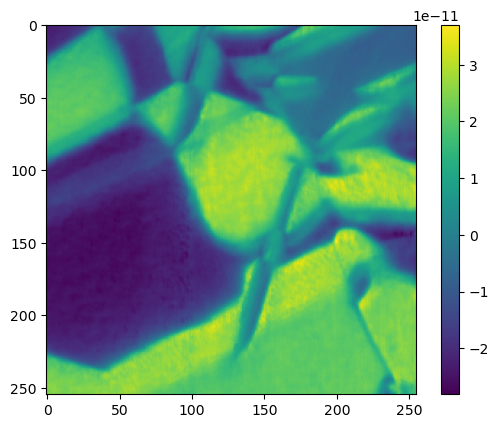

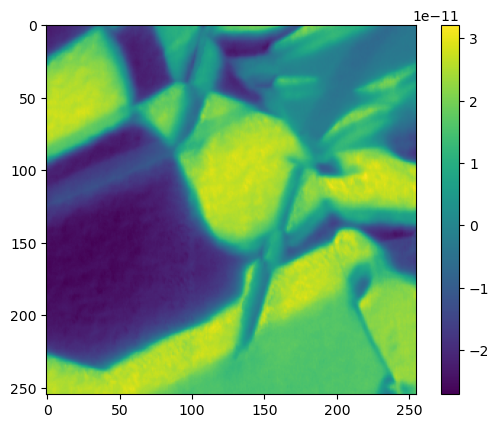

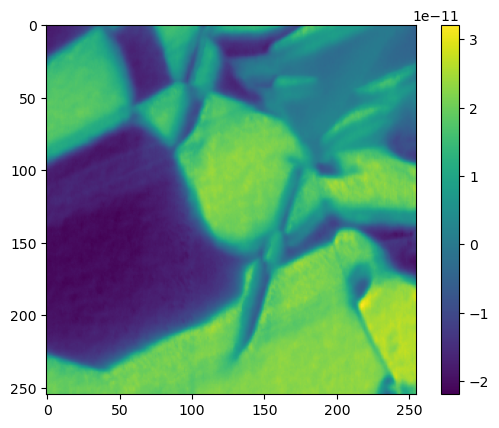

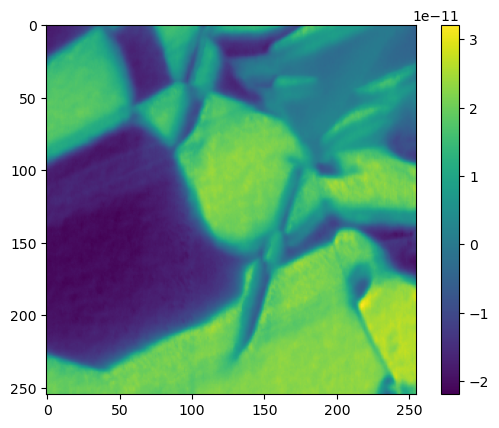

In [18]:
os.chdir(file_loc)
save_3DPFM_as_hdf5(base_filename, base_filename)